# Classifieur Random Forest 

### Chargement des données et division en features/cibles

In [1]:
import pandas as pd
import re
%matplotlib inline

In [3]:
df = pd.read_csv("../../data/prepared_data/dataset.csv")

In [4]:
models = df["model"]

In [5]:
# Labels à prédire
labels_cols = [col for col in df.columns if re.match("comp[1-4]$",col)]
Y = df[labels_cols]

# Features
drop_cols = labels_cols+["machineID", "datetime","total_failure","failure_bool","total_error","total_error_24","model"]
X = df.drop(columns=drop_cols)


### Corrélation des colonnes sur les erreurs

['error1', 'error2', 'error3', 'error4', 'error5', 'error1_24', 'error2_24', 'error3_24', 'error4_24', 'error5_24']


<AxesSubplot:>

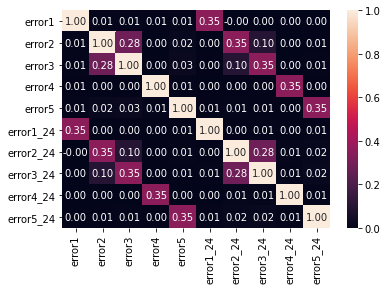

In [17]:
err_cols = [col for col in X.columns if re.match(".*error.*",col)]
print(err_cols)
import seaborn as sns
sns.heatmap(X[err_cols].corr(),annot=True,fmt=".2f")

### Entrainement du modèle

In [10]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=42)

forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest)
multi_target_forest.fit(X_train, Y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(random_state=1))

### Evaluation du modèle

In [31]:
Y_pred = multi_target_forest.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score

for i in range(4):
    print(f"{accuracy_score(Y_pred[:,i],Y_test.iloc[:,i])*100:.2f}%")


99.87%
99.92%
99.98%
99.93%
